<a href="https://colab.research.google.com/github/stephanyresque/Ciencia-de-dados-2/blob/main/28_11_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

DATA = 'C:\\Users\\steph\\OneDrive\\Documentos\\MeusProjetos\\Ciencia-de-dados\\dados_hash\\blood_donors.csv'

df = pd.read_csv(DATA)
df.head()

,donor_id,blood_type
0,1,a+
1,2,a+
2,3,a+
3,4,a+
4,5,a+


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   donor_id    60 non-null     int64 
 1   blood_type  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [3]:
df.tail()

,donor_id,blood_type
55,56,o+
56,57,o+
57,58,o+
58,59,o-
59,60,o-


In [4]:
df.describe(exclude = 'number')

,blood_type
count,60
unique,8
top,o+
freq,32


In [5]:
df['blood_type'].value_counts()

blood_type
o+     32
a+     15
b+      6
a-      2
o-      2
b-      1
ab+     1
ab-     1
Name: count, dtype: int64

In [6]:
df['blood_type'].value_counts().sort_index()

blood_type
a+     15
a-      2
ab+     1
ab-     1
b+      6
b-      1
o+     32
o-      2
Name: count, dtype: int64

In [7]:
df_estatistica = pd.DataFrame()

df_estatistica['frequencia'] = df['blood_type'].value_counts().sort_index()

df_estatistica['frequencia_relativa'] = df['blood_type'].value_counts(normalize=True).sort_index()

df_estatistica['frequencia_acumulada'] = df_estatistica['frequencia'].cumsum()

df_estatistica['frequencia_relativa_acumulada'] = df_estatistica['frequencia_relativa'].cumsum()


df_estatistica

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
blood_type,,,,
a+,15,0.250000,15,0.250000
a-,2,0.033333,17,0.283333
ab+,1,0.016667,18,0.300000
ab-,1,0.016667,19,0.316667
b+,6,0.100000,25,0.416667
b-,1,0.016667,26,0.433333
o+,32,0.533333,58,0.966667
o-,2,0.033333,60,1.000000


In [10]:
from meus_modulos.auxiliares import tabela_dist_freq

In [14]:
df_tabela = tabela_dist_freq(df, 'blood_type')

df_tabela

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
blood_type,,,,
a+,15,0.250000,15,0.250000
a-,2,0.033333,17,0.283333
ab+,1,0.016667,18,0.300000
ab-,1,0.016667,19,0.316667
b+,6,0.100000,25,0.416667
b-,1,0.016667,26,0.433333
o+,32,0.533333,58,0.966667
o-,2,0.033333,60,1.000000


<Axes: xlabel='blood_type', ylabel='count'>

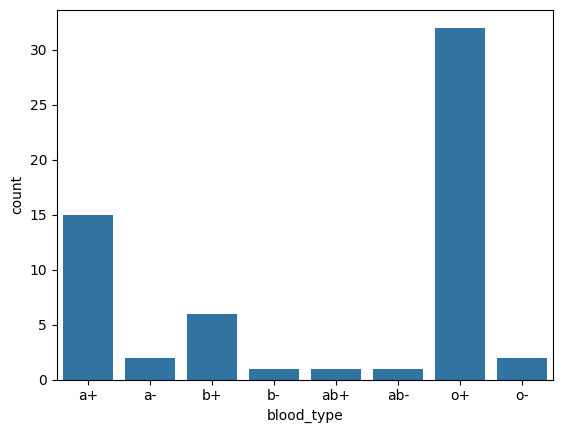

In [12]:
import seaborn as sns

sns.countplot(data = df, x = 'blood_type')

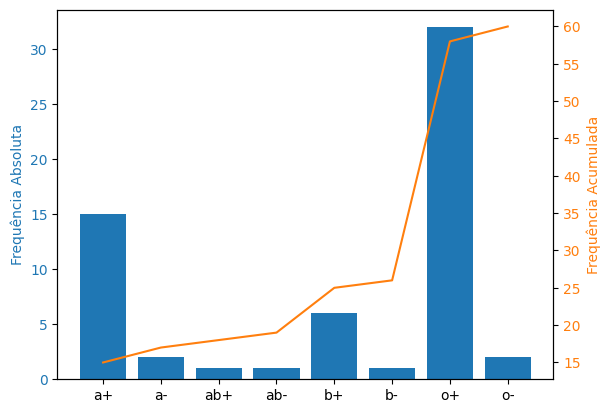

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_tabela.index, df_tabela['frequencia'], color = 'C0')
ax2.plot(df_tabela.index, df_tabela['frequencia_acumulada'], color = 'C1')

ax.set_ylabel('Frequência Absoluta', color = 'C0')
ax.tick_params(axis='y', labelcolor='C0')

ax2.set_ylabel('Frequência Acumulada', color = 'C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_locator(mtick.MultipleLocator(base=5.0))

plt.show()

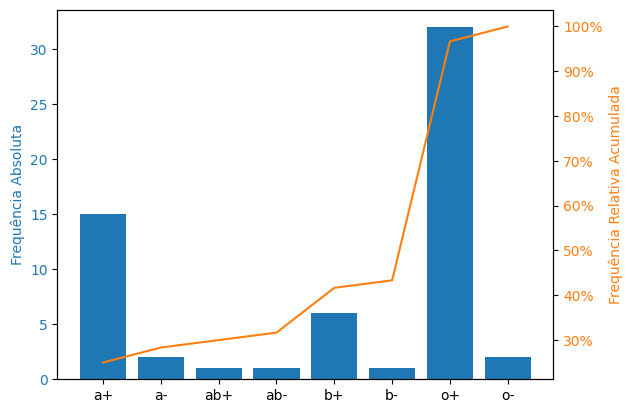

In [25]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fig, ax = plt.subplots()

ax2 = ax.twinx()

ax.bar(df_tabela.index, df_tabela['frequencia'], color = 'C0')
ax2.plot(df_tabela.index, df_tabela['frequencia_relativa_acumulada'], color = 'C1')

ax.set_ylabel('Frequência Absoluta', color = 'C0')
ax.tick_params(axis='y', labelcolor='C0')

ax2.set_ylabel('Frequência Relativa Acumulada', color = 'C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.show()